# Main Modelling Notebook

In [1]:
import itertools as it
import matplotlib
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import pandas as pd
import scipy as sp
import sklearn.preprocessing as Preprocessing
import datetime

from itertools import combinations
from sklearn.cross_validation import KFold as kfold
from sklearn.decomposition import TruncatedSVD as tSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import LogisticRegression as Log_Reg
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from scipy.io import mmread

%matplotlib inline
plt.style.use('ggplot') 
from IPython.display import display, HTML

#### Load Data

In [54]:
# load data
%run -i data_loading.py

173805
79052
Indexes computed
address_state object
annual_income float64
cpi float64
delinq_2_yrs int64
desc_len float64
dti float64
employ_length object
employ_title object
gdp float64
home_owner object
initial_list_status object
inquiry_6_mos int64
installment float64
ipr float64
loan_amount int64
loan_purpose object
loan_term int64
months_since_last_record float64
open_accounts int64
revol_util float64
rir float64
total_accounts int64
unemploy float64
months_since_earliest_credit float64
Training set has 19719 rows
address_state object
annual_income float64
cpi float64
delinq_2_yrs int64
desc_len float64
dti float64
employ_length object
employ_title object
gdp float64
home_owner object
initial_list_status object
inquiry_6_mos int64
installment float64
ipr float64
loan_amount int64
loan_purpose object
loan_term int64
months_since_last_record float64
open_accounts int64
revol_util float64
rir float64
total_accounts int64
unemploy float64
months_since_earliest_credit float64
Test set h

#### Set up Modelling Framework

In [63]:
# set up modelling framework
% run -i modelling_framework.py

#### Models without PCA

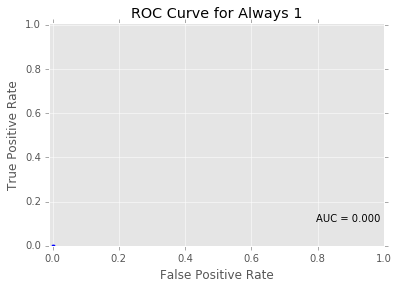

all   score: 0.845  baseline: 0.845   1-prec: 0.845   f1: 0.000  | test score 0.152  1-prec 0.848 f1 0.263  GP 851MM
2011  score: 0.887  baseline: 0.887   wscore: 0.887   f1: 0.000  | test score 0.896  1-prec 0.896
2012  score: 0.867  baseline: 0.867   wscore: 0.867   f1: 0.000  | test score 0.863  1-prec 0.863
2013  score: 0.818  baseline: 0.818   wscore: 0.818   f1: 0.000  | test score 0.825  1-prec 0.825


In [56]:
eval_model_by_year(lambda: DummyClassifier(strategy='constant', constant=0), model_name='Always 1')

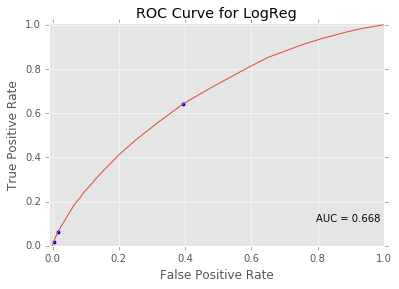

all   score: 0.845  baseline: 0.845   1-prec: 0.847   f1: 0.032  | test score 0.152  1-prec 0.850 f1 0.260  GP 838MM
2011  score: 0.885  baseline: 0.887   wscore: 0.888   f1: 0.025  | test score 0.895  1-prec 0.896
2012  score: 0.867  baseline: 0.867   wscore: 0.868   f1: 0.012  | test score 0.862  1-prec 0.864
2013  score: 0.816  baseline: 0.818   wscore: 0.824   f1: 0.087  | test score 0.823  1-prec 0.829


In [57]:
eval_model_by_year(lambda: Log_Reg(), model_name='LogReg')

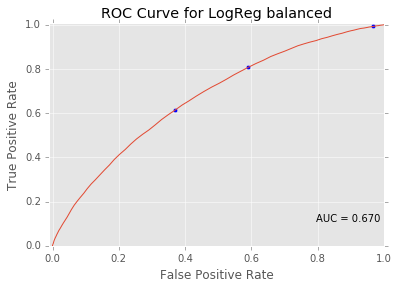

all   score: 0.635  baseline: 0.845   1-prec: 0.903   f1: 0.346  | test score 0.372  1-prec 0.901 f1 0.157  GP 264MM
2011  score: 0.629  baseline: 0.887   wscore: 0.912   f1: 0.239  | test score 0.626  1-prec 0.924
2012  score: 0.630  baseline: 0.867   wscore: 0.913   f1: 0.302  | test score 0.620  1-prec 0.898
2013  score: 0.640  baseline: 0.818   wscore: 0.884   f1: 0.385  | test score 0.634  1-prec 0.887


In [58]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), model_name='LogReg balanced')

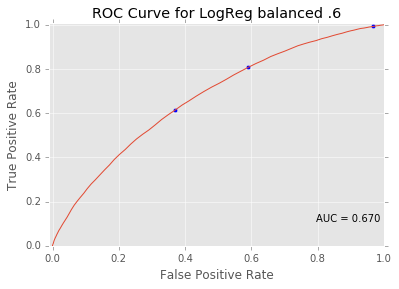

all   score: 0.635  baseline: 0.845   1-prec: 0.923   f1: 0.346  | test score 0.530  1-prec 0.923 f1 0.110  GP -27MM
2011  score: 0.629  baseline: 0.887   wscore: 0.918   f1: 0.239  | test score 0.626  1-prec 0.936
2012  score: 0.630  baseline: 0.867   wscore: 0.932   f1: 0.302  | test score 0.620  1-prec 0.917
2013  score: 0.640  baseline: 0.818   wscore: 0.907   f1: 0.385  | test score 0.634  1-prec 0.906


In [59]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), prob_threshold=.6, model_name='LogReg balanced .6')

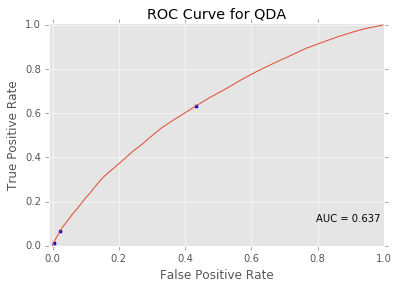

all   score: 0.844  baseline: 0.845   1-prec: 0.847   f1: 0.025  | test score 0.153  1-prec 0.850 f1 0.261  GP 842MM
2011  score: 0.878  baseline: 0.887   wscore: 0.889   f1: 0.069  | test score 0.883  1-prec 0.899
2012  score: 0.866  baseline: 0.867   wscore: 0.867   f1: 0.010  | test score 0.862  1-prec 0.864
2013  score: 0.812  baseline: 0.818   wscore: 0.823   f1: 0.089  | test score 0.818  1-prec 0.830


In [60]:
eval_model_by_year(lambda: QDA(reg_param = 1), model_name='QDA')

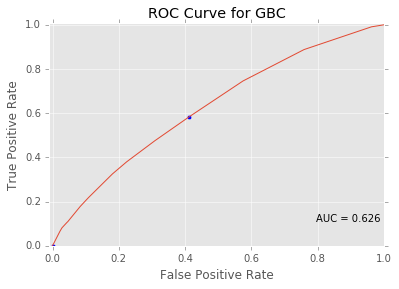

all   score: 0.845  baseline: 0.845   1-prec: 0.845   f1: 0.000  | test score 0.152  1-prec 0.848 f1 0.263  GP 851MM
2011  score: 0.887  baseline: 0.887   wscore: 0.887   f1: 0.015  | test score 0.895  1-prec 0.896
2012  score: 0.867  baseline: 0.867   wscore: 0.867   f1: 0.000  | test score 0.863  1-prec 0.863
2013  score: 0.818  baseline: 0.818   wscore: 0.818   f1: 0.000  | test score 0.825  1-prec 0.825


In [61]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1), model_name='GBC')

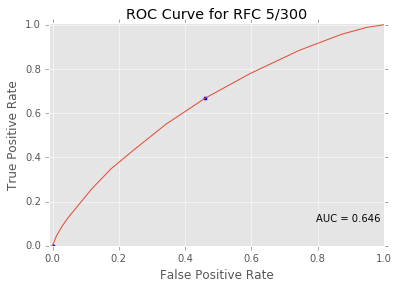

all   score: 0.845  baseline: 0.845   1-prec: 0.845   f1: 0.000  | test score 0.152  1-prec 0.848 f1 0.263  GP 851MM
2011  score: 0.887  baseline: 0.887   wscore: 0.887   f1: 0.000  | test score 0.896  1-prec 0.896
2012  score: 0.867  baseline: 0.867   wscore: 0.867   f1: 0.000  | test score 0.863  1-prec 0.863
2013  score: 0.818  baseline: 0.818   wscore: 0.818   f1: 0.000  | test score 0.825  1-prec 0.825


In [64]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300), model_name='RFC 5/300')

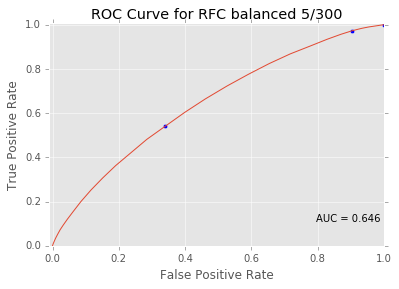

all   score: 0.650  baseline: 0.845   1-prec: 0.890   f1: 0.327  | test score 0.358  1-prec 0.889 f1 0.178  GP 321MM
2011  score: 0.774  baseline: 0.887   wscore: 0.901   f1: 0.217  | test score 0.779  1-prec 0.913
2012  score: 0.650  baseline: 0.867   wscore: 0.902   f1: 0.284  | test score 0.638  1-prec 0.886
2013  score: 0.659  baseline: 0.818   wscore: 0.871   f1: 0.366  | test score 0.664  1-prec 0.874


In [65]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, class_weight = 'balanced', n_estimators=300),
                   model_name='RFC balanced 5/300')

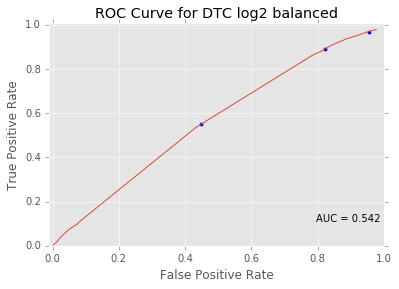

all   score: 0.598  baseline: 0.845   1-prec: 0.874   f1: 0.284  | test score 0.449  1-prec 0.873 f1 0.198  GP 211MM
2011  score: 0.611  baseline: 0.887   wscore: 0.896   f1: 0.200  | test score 0.505  1-prec 0.914
2012  score: 0.547  baseline: 0.867   wscore: 0.887   f1: 0.241  | test score 0.491  1-prec 0.891
2013  score: 0.598  baseline: 0.818   wscore: 0.858   f1: 0.329  | test score 0.588  1-prec 0.859


In [66]:
eval_model_by_year(lambda: DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', criterion = 'gini'),
                  model_name='DTC log2 balanced')

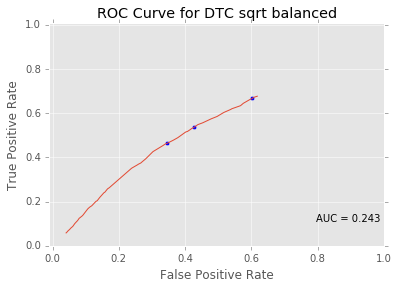

all   score: 0.634  baseline: 0.845   1-prec: 0.863   f1: 0.260  | test score 0.375  1-prec 0.872 f1 0.206  GP 361MM
2011  score: 0.737  baseline: 0.887   wscore: 0.889   f1: 0.158  | test score 0.725  1-prec 0.904
2012  score: 0.659  baseline: 0.867   wscore: 0.877   f1: 0.214  | test score 0.633  1-prec 0.871
2013  score: 0.630  baseline: 0.818   wscore: 0.838   f1: 0.285  | test score 0.642  1-prec 0.841


In [67]:
eval_model_by_year(lambda: DTC(max_depth = 20, max_features = 'sqrt', class_weight = 'balanced', criterion = 'entropy'),
                  model_name='DTC sqrt balanced')

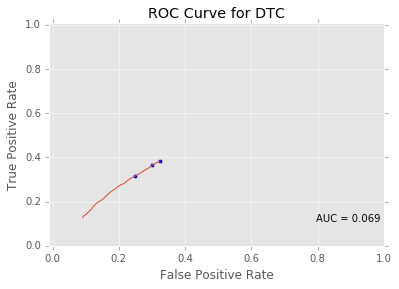

all   score: 0.679  baseline: 0.845   1-prec: 0.858   f1: 0.237  | test score 0.314  1-prec 0.860 f1 0.233  GP 501MM
2011  score: 0.768  baseline: 0.887   wscore: 0.890   f1: 0.152  | test score 0.770  1-prec 0.900
2012  score: 0.713  baseline: 0.867   wscore: 0.879   f1: 0.216  | test score 0.632  1-prec 0.875
2013  score: 0.681  baseline: 0.818   wscore: 0.835   f1: 0.268  | test score 0.691  1-prec 0.842


In [68]:
eval_model_by_year(lambda: DTC(max_depth = 20, max_features = None, class_weight = 'balanced', criterion = 'entropy'),
                  model_name='DTC')

In [69]:
# This takes a very long time for practically no uplift
#eval_model_all_years(lambda: SVC(class_weight='balanced', probability=True))

In [70]:
# This takes a very long time for practically no uplift
#eval_model_all_years(lambda: SVC(class_weight='balanced', probability=True), prob_threshold=0.85)

#### Other Models without PCA

In [71]:
# TODO: Try again, this time fitting a regression against the payments received

In [72]:
# Curious -- what are the 95 CI for the baselines?
for yr in set(years.values):
    yr_n = (years == yr).sum()
    yr_def = (y[years == yr]).sum()
    yr_p = (y[years == yr]).mean()
    yr_se = (yr_p * (1.0-yr_p) / yr_n)
    print "y=%4d   n=%4d   d=%4d   p: %.3f | %.3f | %.3f" % (yr, yr_n, yr_def, yr_p - 1.96*yr_se, yr_p, yr_p + 1.96*yr_se)

y=2011   n=2521   d= 286   p: 0.113 | 0.113 | 0.114
y=2012   n=7475   d= 994   p: 0.133 | 0.133 | 0.133
y=2013   n=9723   d=1767   p: 0.182 | 0.182 | 0.182


In [73]:
# Default rate for small business is higher, right?
print y.mean()
print y[x_expanded.loan_purpose__small_business == 1].mean()

0.154521020336
0.230563002681


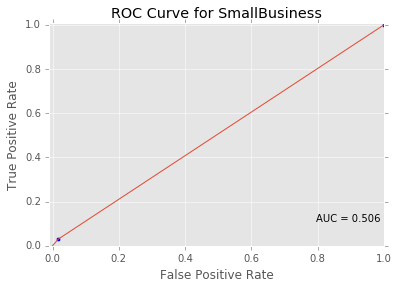

all   score: 0.835  baseline: 0.845   1-prec: 0.847   f1: 0.050  | test score 0.162  1-prec 0.850 f1 0.260  GP 819MM
2011  score: 0.714  baseline: 0.887   wscore: 0.856   f1: 0.070  | test score 0.874  1-prec 0.899
2012  score: 0.852  baseline: 0.867   wscore: 0.868   f1: 0.058  | test score 0.849  1-prec 0.865
2013  score: 0.816  baseline: 0.818   wscore: 0.820   f1: 0.042  | test score 0.821  1-prec 0.826


In [74]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), ['loan_purpose__small_business'], model_name='SmallBusiness')

In [75]:
# LogReg is doing well.. what are the largest coefficients?
lr = Log_Reg(class_weight='balanced').fit(x_expanded[years.isin([2011,2012,2013])], y[years.isin([2011,2012,2013])])
lr_coeff = pd.DataFrame(lr.coef_.T, index=x_expanded.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()

In [76]:
lr_coeff.sort_values('abs', ascending=False).coeff

loan_amount                                  -2.996568
installment                                   2.712334
employ_title__walmart                        -1.694660
employ_title__The_Home_Depot                 -1.433333
employ_title__United_Parcel_Service          -1.316579
employ_title__Time_Warner_Cable              -1.251917
employ_title__United_States_Postal_Service   -1.012053
employ_title__USPS                            0.999461
employ_title__US_Army                        -0.917707
employ_title__JP_Morgan_Chase                -0.906289
employ_title__State_of_California            -0.853006
employ_title__United_States_Air_Force        -0.845438
employ_title__Department_of_Defense          -0.840943
address_state__IA                             0.835219
employ_title__Home_Depot                      0.834280
employ_title__Driver                         -0.761986
employ_title__Chase                          -0.656704
loan_purpose__renewable_energy                0.635404
employ_tit

In [77]:
lr_probs = lr.predict_proba(x_expanded)[:,0]

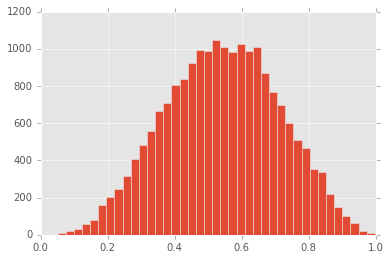

In [78]:
plt.hist(lr_probs ,bins=40)
plt.show()

In [79]:
1 - y.groupby([int(p*20)/20.0 for p in lr_probs]).mean()

0.00    0.333333
0.05    0.413793
0.10    0.546392
0.15    0.575875
0.20    0.624217
0.25    0.667925
0.30    0.699910
0.35    0.759134
0.40    0.807845
0.45    0.834000
0.50    0.855792
0.55    0.867769
0.60    0.904647
0.65    0.925330
0.70    0.941429
0.75    0.958824
0.80    0.966667
0.85    0.972222
0.90    0.957576
0.95    0.965517
Name: loan_status, dtype: float64

In [80]:
# probs = eval_model_with_threshold(lambda: Log_Reg())

In [81]:
# probs = eval_model_with_threshold(lambda: Log_Reg(class_weight='balanced'))

In [82]:
# VERY SLOW
#probs = eval_model_with_threshold(lambda: SVC(
#        random_state=1729,
#        probability=True))

#### Models with PCA

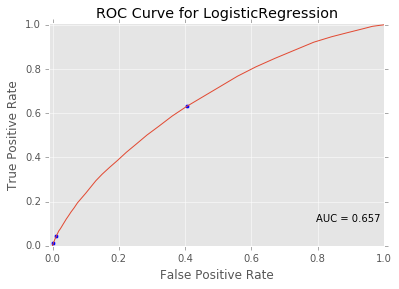

all   score: 0.845  baseline: 0.845   1-prec: 0.846   f1: 0.020  | test score 0.152  1-prec 0.849 f1 0.261  GP 846MM
2011  score: 0.885  baseline: 0.887   wscore: 0.888   f1: 0.025  | test score 0.895  1-prec 0.896
2012  score: 0.867  baseline: 0.867   wscore: 0.867   f1: 0.008  | test score 0.863  1-prec 0.864
2013  score: 0.816  baseline: 0.818   wscore: 0.822   f1: 0.064  | test score 0.823  1-prec 0.829


In [83]:
eval_model_by_year(lambda: Log_Reg(), x = x_expanded_pca, x_test = x_test_expanded_pca)

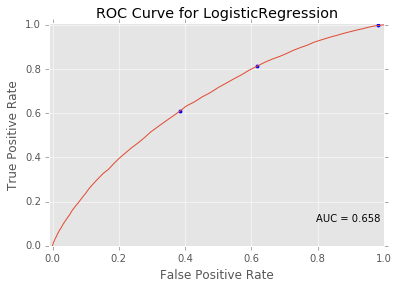

all   score: 0.625  baseline: 0.845   1-prec: 0.901   f1: 0.339  | test score 0.385  1-prec 0.898 f1 0.162  GP 250MM
2011  score: 0.622  baseline: 0.887   wscore: 0.911   f1: 0.236  | test score 0.615  1-prec 0.924
2012  score: 0.613  baseline: 0.867   wscore: 0.908   f1: 0.289  | test score 0.600  1-prec 0.898
2013  score: 0.635  baseline: 0.818   wscore: 0.881   f1: 0.379  | test score 0.627  1-prec 0.884


In [84]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), x = x_expanded_pca, x_test = x_test_expanded_pca)

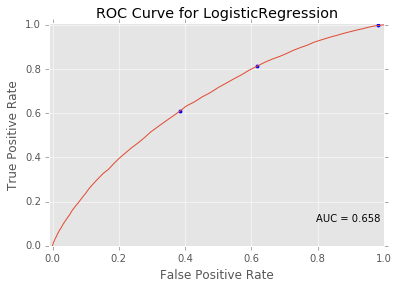

all   score: 0.625  baseline: 0.845   1-prec: 0.922   f1: 0.339  | test score 0.551  1-prec 0.920 f1 0.113  GP -79MM
2011  score: 0.622  baseline: 0.887   wscore: 0.923   f1: 0.236  | test score 0.615  1-prec 0.935
2012  score: 0.613  baseline: 0.867   wscore: 0.927   f1: 0.289  | test score 0.600  1-prec 0.915
2013  score: 0.635  baseline: 0.818   wscore: 0.906   f1: 0.379  | test score 0.627  1-prec 0.902


In [85]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), prob_threshold=.6, 
                   x = x_expanded_pca, x_test = x_test_expanded_pca)

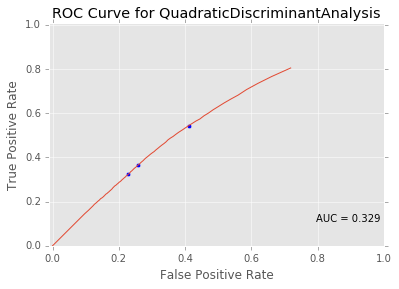

all   score: 0.699  baseline: 0.845   1-prec: 0.867   f1: 0.270  | test score 0.296  1-prec 0.864 f1 0.226  GP 517MM
2011  score: 0.681  baseline: 0.887   wscore: 0.898   f1: 0.200  | test score 0.728  1-prec 0.903
2012  score: 0.705  baseline: 0.867   wscore: 0.879   f1: 0.220  | test score 0.710  1-prec 0.874
2013  score: 0.699  baseline: 0.818   wscore: 0.840   f1: 0.283  | test score 0.681  1-prec 0.844


In [86]:
eval_model_by_year(lambda: QDA(), x = x_expanded_pca, x_test = x_test_expanded_pca)

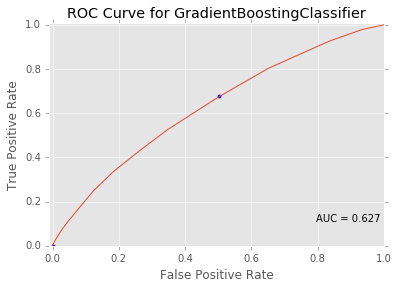

all   score: 0.845  baseline: 0.845   1-prec: 0.845   f1: 0.000  | test score 0.152  1-prec 0.848 f1 0.263  GP 851MM
2011  score: 0.887  baseline: 0.887   wscore: 0.887   f1: 0.000  | test score 0.896  1-prec 0.896
2012  score: 0.867  baseline: 0.867   wscore: 0.867   f1: 0.000  | test score 0.863  1-prec 0.863
2013  score: 0.818  baseline: 0.818   wscore: 0.818   f1: 0.000  | test score 0.825  1-prec 0.825


In [87]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                  x = x_expanded_pca, x_test = x_test_expanded_pca)

## NLP Modeling

#### Top Terms in Each Class

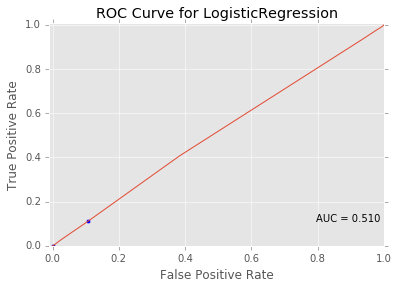

all   score: 0.860  baseline: 0.860   1-prec: 0.860   f1: 0.000  | test score 0.142  1-prec 0.858 f1 0.248  GP 211MM
2011  score: 0.899  baseline: 0.899   wscore: 0.899   f1: 0.000  | test score 0.899  1-prec 0.899
2012  score: 0.865  baseline: 0.865   wscore: 0.865   f1: 0.000  | test score 0.866  1-prec 0.866
2013  score: 0.834  baseline: 0.834   wscore: 0.834   f1: 0.000  | test score 0.827  1-prec 0.827


In [88]:
eval_model_by_year(lambda: Log_Reg(), x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

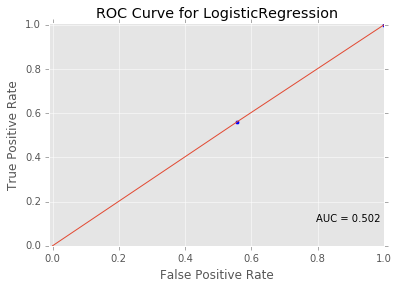

all   score: 0.465  baseline: 0.860   1-prec: 0.862   f1: 0.219  | test score 0.540  1-prec 0.859 f1 0.213  GP 2MM
2011  score: 0.739  baseline: 0.899   wscore: 0.896   f1: 0.110  | test score 0.849  1-prec 0.900
2012  score: 0.790  baseline: 0.865   wscore: 0.866   f1: 0.119  | test score 0.713  1-prec 0.864
2013  score: 0.244  baseline: 0.834   wscore: 0.824   f1: 0.274  | test score 0.464  1-prec 0.823


In [89]:
eval_model_by_year(lambda: Log_Reg(C = 10 ** -6, class_weight = 'balanced'), 
                   x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

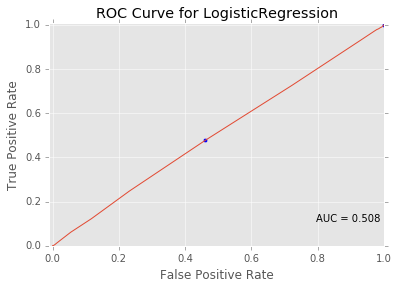

all   score: 0.558  baseline: 0.860   1-prec: nan   f1: 0.212  | test score 0.858  1-prec 0.818 f1 0.002  GP -159MM
2011  score: 0.555  baseline: 0.899   wscore: 0.905   f1: 0.158  | test score 0.550  1-prec 0.876
2012  score: 0.478  baseline: 0.865   wscore: 0.911   f1: 0.218  | test score 0.458  1-prec 0.837
2013  score: 0.534  baseline: 0.834   wscore: 0.847   f1: 0.233  | test score 0.471  1-prec 0.853


In [90]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), prob_threshold = 0.6,
                   x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

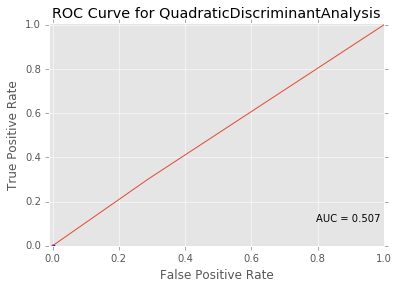

all   score: 0.860  baseline: 0.860   1-prec: 0.860   f1: 0.000  | test score 0.142  1-prec 0.858 f1 0.248  GP 211MM
2011  score: 0.899  baseline: 0.899   wscore: 0.899   f1: 0.000  | test score 0.899  1-prec 0.899
2012  score: 0.865  baseline: 0.865   wscore: 0.865   f1: 0.000  | test score 0.866  1-prec 0.866
2013  score: 0.834  baseline: 0.834   wscore: 0.834   f1: 0.000  | test score 0.827  1-prec 0.827


In [91]:
eval_model_by_year(lambda: QDA(reg_param = 1), x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

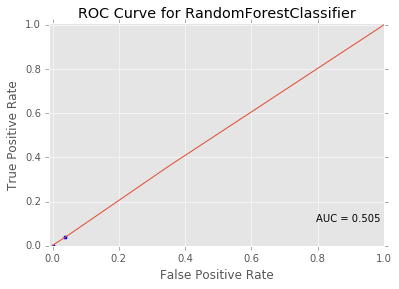

all   score: 0.860  baseline: 0.860   1-prec: 0.860   f1: 0.000  | test score 0.142  1-prec 0.858 f1 0.248  GP 211MM
2011  score: 0.899  baseline: 0.899   wscore: 0.899   f1: 0.000  | test score 0.899  1-prec 0.899
2012  score: 0.865  baseline: 0.865   wscore: 0.865   f1: 0.000  | test score 0.866  1-prec 0.866
2013  score: 0.834  baseline: 0.834   wscore: 0.834   f1: 0.000  | test score 0.827  1-prec 0.827


In [92]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

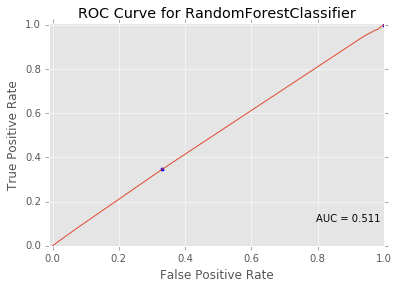

all   score: 0.627  baseline: 0.860   1-prec: 0.861   f1: 0.197  | test score 0.376  1-prec 0.861 f1 0.229  GP 85MM
2011  score: 0.713  baseline: 0.899   wscore: 0.897   f1: 0.130  | test score 0.729  1-prec 0.895
2012  score: 0.531  baseline: 0.865   wscore: 0.868   f1: 0.215  | test score 0.486  1-prec 0.861
2013  score: 0.636  baseline: 0.834   wscore: 0.833   f1: 0.206  | test score 0.551  1-prec 0.822


In [93]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300, class_weight = 'balanced'),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

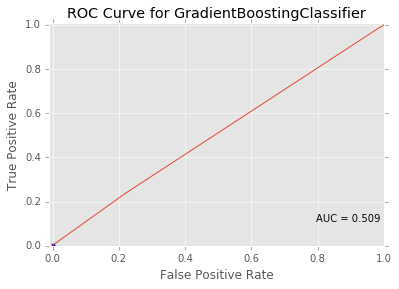

all   score: 0.860  baseline: 0.860   1-prec: 0.860   f1: 0.000  | test score 0.142  1-prec 0.858 f1 0.248  GP 211MM
2011  score: 0.899  baseline: 0.899   wscore: 0.899   f1: 0.000  | test score 0.899  1-prec 0.899
2012  score: 0.865  baseline: 0.865   wscore: 0.865   f1: 0.000  | test score 0.866  1-prec 0.866
2013  score: 0.834  baseline: 0.834   wscore: 0.834   f1: 0.000  | test score 0.827  1-prec 0.827


In [94]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test)

#### Full Document-Term Matrix (Reduced with PCA)

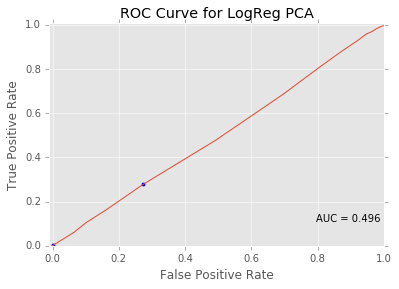

all   score: 0.860  baseline: 0.860   1-prec: 0.860   f1: 0.002  | test score 0.142  1-prec 0.858 f1 0.248  GP 216MM
2011  score: 0.894  baseline: 0.899   wscore: 0.898   f1: 0.005  | test score 0.893  1-prec 0.899
2012  score: 0.862  baseline: 0.865   wscore: 0.865   f1: 0.008  | test score 0.864  1-prec 0.866
2013  score: 0.832  baseline: 0.834   wscore: 0.834   f1: 0.001  | test score 0.826  1-prec 0.827


In [95]:
eval_model_by_year(lambda: Log_Reg(), x = desc_matrix_pca, x_test = desc_matrix_test_pca, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='LogReg PCA')

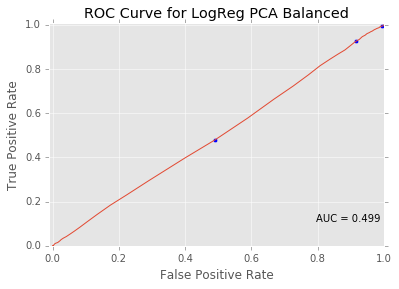

all   score: 0.509  baseline: 0.860   1-prec: 0.860   f1: 0.216  | test score 0.495  1-prec 0.856 f1 0.226  GP 31MM
2011  score: 0.616  baseline: 0.899   wscore: 0.903   f1: 0.169  | test score 0.574  1-prec 0.888
2012  score: 0.525  baseline: 0.865   wscore: 0.868   f1: 0.215  | test score 0.524  1-prec 0.864
2013  score: 0.524  baseline: 0.834   wscore: 0.833   f1: 0.242  | test score 0.519  1-prec 0.822


In [96]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), x = desc_matrix_pca, x_test = desc_matrix_test_pca, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='LogReg PCA Balanced')

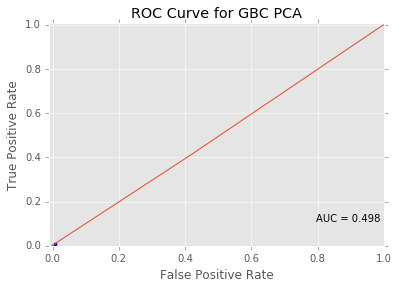

all   score: 0.860  baseline: 0.860   1-prec: 0.860   f1: 0.000  | test score 0.142  1-prec 0.858 f1 0.248  GP 217MM
2011  score: 0.899  baseline: 0.899   wscore: 0.899   f1: 0.000  | test score 0.899  1-prec 0.899
2012  score: 0.865  baseline: 0.865   wscore: 0.865   f1: 0.000  | test score 0.865  1-prec 0.866
2013  score: 0.834  baseline: 0.834   wscore: 0.834   f1: 0.000  | test score 0.827  1-prec 0.827


In [97]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                   x = desc_matrix_pca, x_test = desc_matrix_test_pca,
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='GBC PCA')

## Stacking

In [98]:
# function to create model stack
def create_model_stack(x_train, y_train):
    model_stack = []

    model_stack.append(Log_Reg(C = 10 ** -5, class_weight = 'balanced').fit(x_train, y_train))
    model_stack.append(LDA(shrinkage = 1, solver = 'lsqr').fit(x_train, y_train))
    model_stack.append(QDA(reg_param = 1).fit(x_train, y_train))
    model_stack.append(RFC(n_estimators = 300, max_depth = 5, class_weight = 'balanced').fit(x_train, y_train))
    model_stack.append(GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1).fit(x_train, y_train))
    model_stack.append(DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini').fit(x_train, y_train))
    model_stack.append(DTC(max_depth = 20, max_features = 'sqrt', class_weight = 'balanced', 
                           criterion = 'entropy').fit(x_train, y_train))
    model_stack.append(DTC(max_depth = 20, max_features = None, 
                           criterion = 'entropy').fit(x_train, y_train))
    #model_stack.append(SVC(class_weight = 'balanced').fit(x_train, y_train))
    
    return model_stack

In [99]:
# function to fit and score a stacking ensemble
# TO DO: CV
def fit_score_stacking(model_stack, x_train, y_train, x_test, y_test, combiner):
    n_train = x_train.shape[0]
    n_test = x_test.shape[0]
    num_models = len(model_stack)

    # create variables to hold predictions
    y_train_stack = np.zeros((n_train, num_models))
    y_test_stack = np.zeros((n_test, num_models))

    # predict with each model on training and testing data
    for index in range(num_models):
        model = model_stack[index]
        y_train_stack[:, index] = model.predict(x_train)
        y_test_stack[:, index] = model.predict(x_test)

    # fit and predict with ensemble
    combiner.fit(y_train_stack, y_train)
    test_y_hat = combiner.predict(y_test_stack)
    
    # score with ensemble
    score = combiner.score(y_train_stack, y_train)
    test_score = combiner.score(y_test_stack, y_test)
    cm = confusion_matrix(y_test, test_y_hat)
    test_f1 = f1_score(y_test, test_y_hat, pos_label = 1)
    test_precision = 1 - y_test[test_y_hat].mean()
    
    # format confusion matrix
    cm_df = pd.DataFrame(cm, columns = ["Predicted_bad", "Predicted_good"])
    row_labels = pd.DataFrame(["Actual_bad", "Actual_good"])
    cm_df = pd.concat((row_labels, cm_df), axis = 1)
    
    profit_mm = calc_expected_profit(profit_data_test, test_y_hat)

    return score, test_score, cm_df, test_f1, test_precision, profit_mm

In [100]:
# fit and score a stacked model for given predictors and response
def try_one_stacked_model(model_stack, x_train, y_train, x_test, y_test, combiner):

    score, test_score, cm_df, test_f1, test_precision, profit_mm = \
        fit_score_stacking(model_stack, x_train, y_train, x_test, y_test, combiner)

    print "%d  score: %.3f  baseline: %.3f   wscore: ----   f1: ----  | test score %.3f  1-prec %.3f f1 %.3f  GP %dMM" \
         % (0, score, 1 - y_train.mean(), test_score, test_precision, test_f1, profit_mm)

#### Regular Data

In [101]:
model_stack = create_model_stack(x_expanded, y)

In [102]:
combiner = Log_Reg(C = 10 ** -5, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
try_one_stacked_model(model_stack, x_expanded, y, x_test_expanded, y_test, combiner)

0  score: 0.423  baseline: 0.845   wscore: ----   f1: ----  | test score 0.348  1-prec 0.829 f1 0.285  GP 475MM


In [103]:
combiner = RFC(class_weight = 'balanced')
try_one_stacked_model(model_stack, x_expanded, y, x_test_expanded, y_test, combiner)

0  score: 0.906  baseline: 0.845   wscore: ----   f1: ----  | test score 0.704  1-prec 0.791 f1 0.260  GP -286MM


## Visualizations

In [104]:
pd.DataFrame(model_performance).T

,auc,baseline,f1,prec,score,test_f1,test_prec,test_profit,test_score
DTC,0.068802,0.845479,0.236518,0.857650,0.679041,0.232596,0.859927,501.152260,0.314260
DTC log2 balanced,0.542330,0.845479,0.284020,0.873987,0.597595,0.198181,0.872853,211.557174,0.448890
DTC sqrt balanced,0.242991,0.845479,0.260476,0.863490,0.633549,0.206394,0.872168,361.576681,0.375407
GBC PCA,0.498121,0.860461,0.000000,0.860461,0.860461,0.248382,0.858198,217.168405,0.141802
GradientBoostingClassifier,0.509365,0.860461,0.000000,0.860461,0.860461,0.248382,0.858198,211.123874,0.141802
LogReg PCA,0.495639,0.860461,0.002027,0.860444,0.859606,0.248322,0.858218,216.897526,0.142339
LogReg PCA Balanced,0.499365,0.860461,0.216415,0.860094,0.508963,0.226042,0.855602,31.678909,0.494928
LogisticRegression,0.508482,0.860461,0.211713,NaN,0.558212,0.001885,0.818182,-159.317488,0.857728
QuadraticDiscriminantAnalysis,0.506661,0.860461,0.000000,0.860461,0.860461,0.248382,0.858198,211.123874,0.141802
RFC 5/300,0.645964,0.845479,0.000000,0.845479,0.845479,0.263391,0.848331,851.209909,0.151669


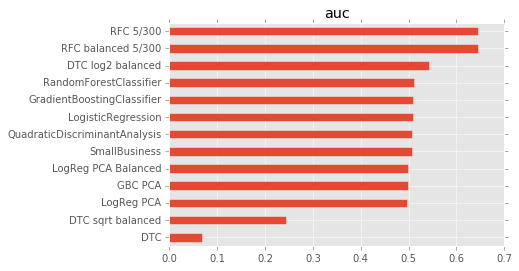

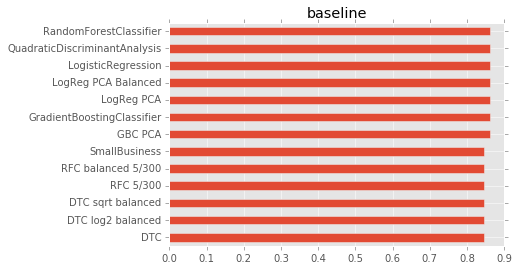

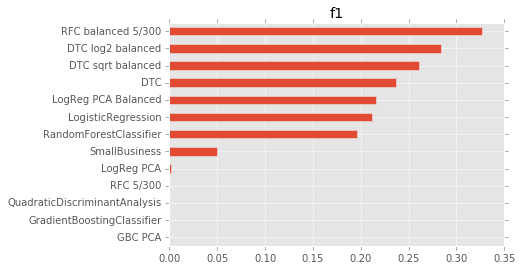

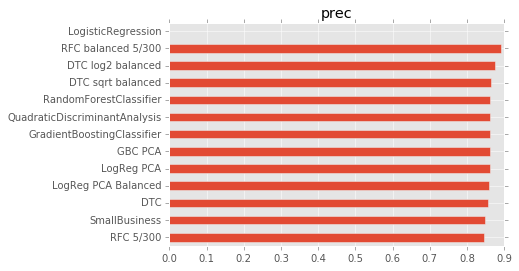

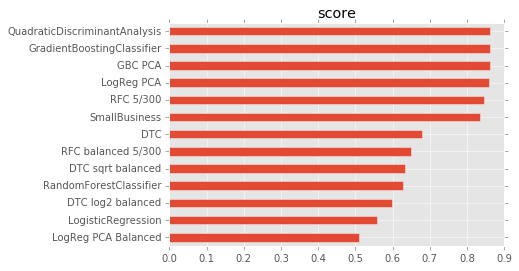

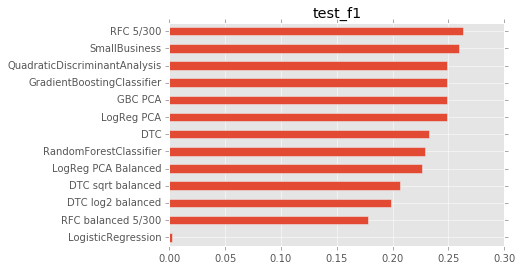

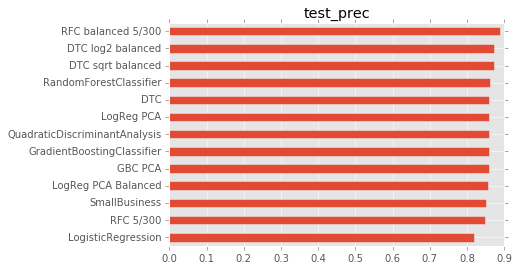

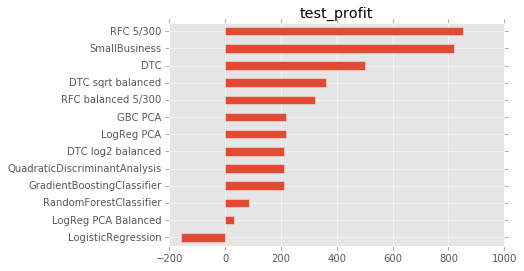

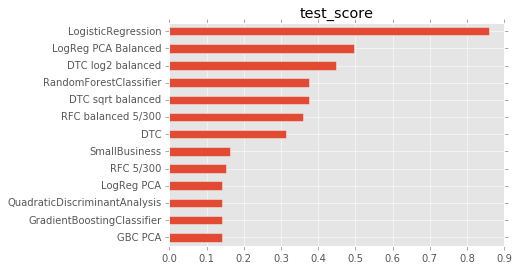

In [105]:
model_performance_df = pd.DataFrame(model_performance).T
for col in model_performance_df.columns:
    model_performance_df[col].sort_values().plot(kind='barh')
    plt.title(col)
    plt.show()